In [117]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import numpy as np

In [118]:
train_dataset = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
train_dataset_ans = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

train_loader = DataLoader(dataset=train_dataset, batch_size=4, shuffle=False)

In [119]:
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(in_features=2, out_features=1)

    def forward(self, input_data):
        out = self.fc1(input_data)
        out = F.sigmoid(out)
        return out


In [120]:
model = ANN()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_function = nn.BCELoss()

Epoch [10/3000], Loss: 0.7238
Epoch [20/3000], Loss: 0.7219
Epoch [30/3000], Loss: 0.7202
Epoch [40/3000], Loss: 0.7186
Epoch [50/3000], Loss: 0.7171
Epoch [60/3000], Loss: 0.7157
Epoch [70/3000], Loss: 0.7145
Epoch [80/3000], Loss: 0.7133
Epoch [90/3000], Loss: 0.7123
Epoch [100/3000], Loss: 0.7113
Epoch [110/3000], Loss: 0.7105
Epoch [120/3000], Loss: 0.7096
Epoch [130/3000], Loss: 0.7089
Epoch [140/3000], Loss: 0.7082
Epoch [150/3000], Loss: 0.7075
Epoch [160/3000], Loss: 0.7068
Epoch [170/3000], Loss: 0.7062
Epoch [180/3000], Loss: 0.7056
Epoch [190/3000], Loss: 0.7051
Epoch [200/3000], Loss: 0.7045
Epoch [210/3000], Loss: 0.7040
Epoch [220/3000], Loss: 0.7035
Epoch [230/3000], Loss: 0.7030
Epoch [240/3000], Loss: 0.7025
Epoch [250/3000], Loss: 0.7021
Epoch [260/3000], Loss: 0.7017
Epoch [270/3000], Loss: 0.7012
Epoch [280/3000], Loss: 0.7008
Epoch [290/3000], Loss: 0.7005
Epoch [300/3000], Loss: 0.7001
Epoch [310/3000], Loss: 0.6997
Epoch [320/3000], Loss: 0.6994
Epoch [330/3000],

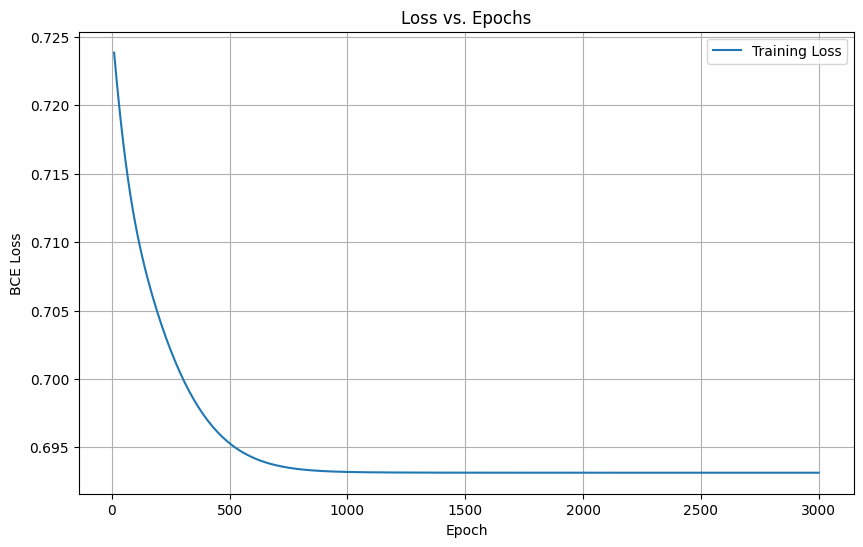

In [121]:
epochs = 3000
epoch_history = []
loss_history = []
for epoch in range(epochs):
    output = model(train_dataset)

    loss = loss_function(output, train_dataset_ans)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')
        epoch_history.append(epoch + 1)
        loss_history.append(loss.item())


plt.figure(figsize=(10, 6))
plt.plot(epoch_history, loss_history, label='Training Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('BCE Loss')
plt.legend()
plt.grid(True)
plt.show()

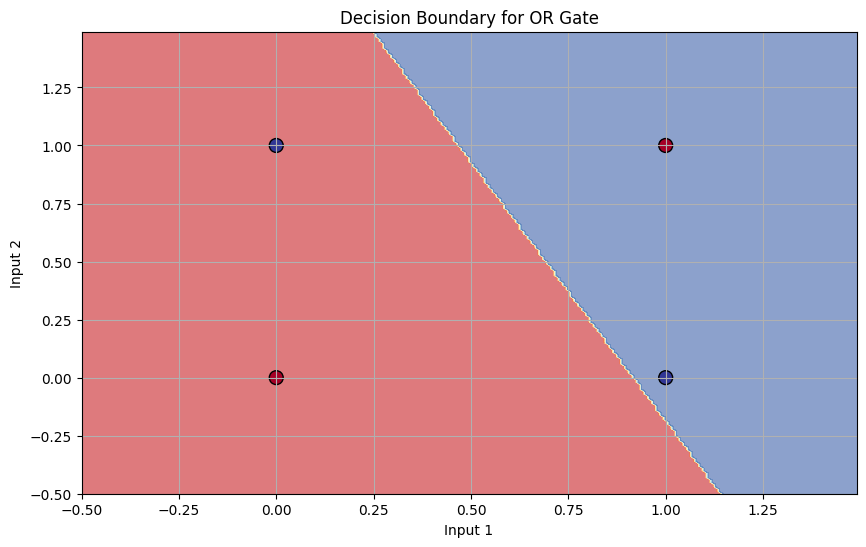

In [122]:
# grapp의 범위 설정
x_min, x_max = -0.5, 1.5
y_min, y_max = -0.5, 1.5
# 뿌려볼 죄표들 생성
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# xx.ravel()과 yy.ravel()로 각 그리드 포인트를 1차원으로 풀고
# np.c_를 사용해 [x, y] 좌표 쌍의 목록으로 만듭니다.
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_tensor = torch.tensor(grid_points, dtype=torch.float32)

# 모델을 평가 모드로 설정
model.eval()
with torch.no_grad(): # Autograd 엔진을 비활성화, 계산 그래프 필요없어
    predictions = model(grid_tensor)
    # 0.5를 기준으로 클래스를 결정(0 또는 1)하고, 원래 그리드 형태로 재구성
    predicted_cls = predictions.round().numpy().reshape(xx.shape)

plt.figure(figsize=(10, 6))
# contourf를 사용해 결정 경계를 색칠
plt.contourf(xx, yy, predicted_cls, cmap=plt.cm.RdYlBu, alpha=0.6)

plt.scatter(train_dataset[:, 0], train_dataset[:, 1], c=train_dataset_ans.squeeze(),
            cmap=plt.cm.RdYlBu, s=100, edgecolors='k')

plt.title('Decision Boundary for OR Gate')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.grid(True)
plt.show()